In [14]:
import numpy as np
from scipy import stats
from scipy import linalg

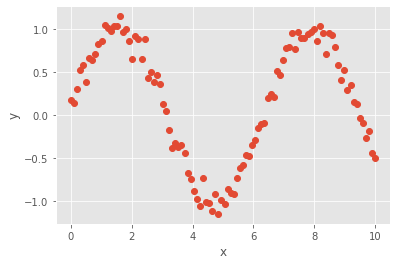

In [15]:
# Generate data for regression
np.random.seed(0)
N = 100
X = np.linspace(0, 10, N)
y = np.sin(X) + np.random.normal(0, 0.1, N)

# plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(X, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
# RBF kernel
def kernel(a, b, param):
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
    return np.exp(-0.5 * (1/param) * sqdist)

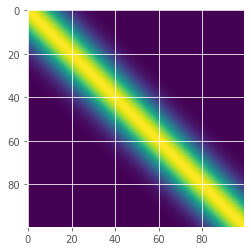

In [25]:
# kernel matrix
param = 1.0
K = kernel(X.reshape(-1, 1), X.reshape(-1, 1), param)

# plot
plt.imshow(K)
plt.show()

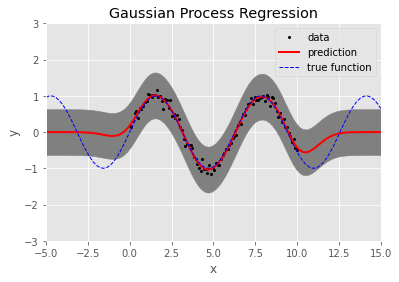

In [39]:
# noise level
noise = 0.1
L = np.linalg.cholesky(K + noise*np.eye(N))
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))

# test points
Xtest = np.linspace(-5, 15, 100).reshape(-1, 1)
Ktest = kernel(X.reshape(-1, 1), Xtest, param)
ytest = np.dot(Ktest.T, alpha)

# plot
plt.plot(X, y, 'o', markersize=2, color='black', label='data')
plt.plot(Xtest, ytest, 'r-', lw=2, label='prediction')
plt.fill_between(Xtest.flat, ytest - 2*np.sqrt(noise), ytest + 2*np.sqrt(noise), color="gray")
plt.plot(Xtest, np.sin(Xtest), 'b--', lw=1, label='true function')
plt.xlim(-5, 15)
plt.ylim(-3, 3)
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()